# 정형 데이터와 비정형 데이터

- 정형 데이터 : 어떤 구조로 되어 있는 데이터
  - 엑셀이나 CSV, Database에 저장하기 쉬움


- 비정형 데이터 : 텍스트 데이터와 같이 표현하기 어려운 것들

- 앙상블 학습 : 정형 데이터를 다루는 데 가장 뛰어난 성과를 내는 알고리즘
  - 대부분 결정 트리를 기반으로 만들어져 있음

# 랜덤 포레스트

- **랜덤포레스트** : 앙상블 학습의 대표 주자 중 하나로 안정적인 성능을 가짐

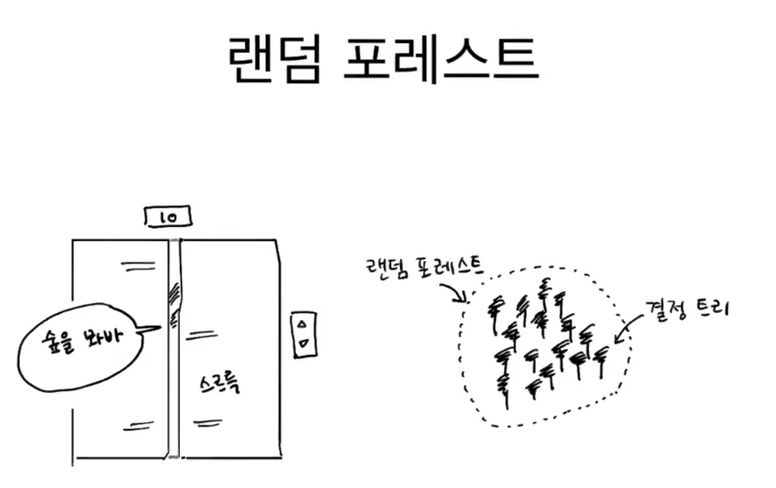

- 랜덤 포레스트는 결정 트리를 랜덤하게 만들어 결정 트리의 숲을 만듦
  - 입력한 훈련 데이터에서 랜덤하게 샘플을 추출하여 훈련 데이터를 만듦
    - 샘플이 중복될 수 있음
    - 이러한 샘플을 **부트스트랩 샘플**이라고 부름

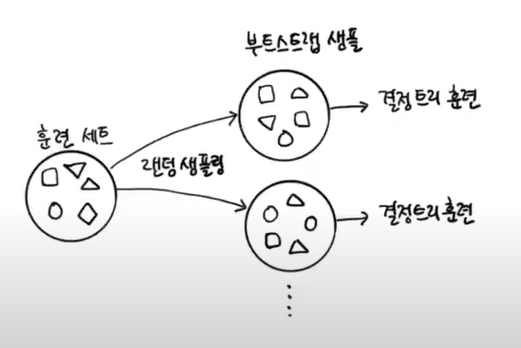

- RandomForesetClassifier : 기본적으로 전체 특성 개수의 제곱근만큼의 특성을 선택함


- RandomForestRegressor : 전체 특성을 사용함

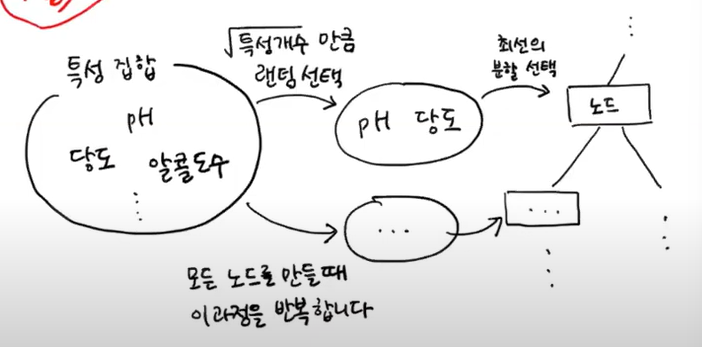

- 사이킷런의 랜덤 포레스트는 기본적으로 100개의 결정 트리를 훈련함

- 분류일 때 -> 각 트리의 클래스별 확률을 평균하여 가장 높은 확률을 가진 클래스를 예측으로 삼음

- 회귀일 때 -> 각 트리의 예측을 평균함

- 랜덤 포레스트는 랜덤하게 선택한 샘플과 특성을 사용하기 때문에 훈련 세트에 과대적합되는 것을 막아줌

- 검증 세트와 테스트 세트에서 안정적인 성능을 얻을 수 있음

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

- cross_validate() 함수를 사용해 교차 검증을 수행해보겠음. 
- RandomForestClassifier는 기본적으로 100개의 결정 트리를 사용함
- n_jobs 매개변수를 -1로 지정하여 모든 CPU 사용
- return_train_score 매개변수를 True로 지정하면 훈련 세트에 대한 점수도 같이 반환함

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


- 다소 과대 적합인 것이 보임
- 매개변수를 더 조정하지 않도록 하겠음
- 랜덤 포레스트는 결정 트리의 앙상블이기 때문에 DecisionTreeClassifier가 제공하는 중요한 매개변수를 모두 제공함
  - criterion, max_depth, max_features, min_samples_split, min_impurity_decrease, min_samples_leaf 
- 랜덤 포레스트의 특성 중요도는 각 결정 트리의 특성 중요도를 취합한 것임
- 앞의 랜덤 포레스트 모델을 훈련 세트에 훈련한 후 특성 중요도를 출력해 보겠음


In [ ]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


- 각각 [알코올 도수, 당도, pH]였는데, 두 번째 특성인 당도의 중요도가 감소하고 알코올 도수와 pH 특성의 중요도가 조금 상승


- 랜덤 포레스트가 특성의 일부를 랜덤하게 선택하여 결정 트리를 훈련하기 때문임


- 그 결과 하나의 특성에 과도하게 집중하지 않고 좀 더 많은 특성이 훈련에 기여할 기회를 얻음


- 과대적합을 줄이고 일반화 성능을 높이는 데 도움이 됨

- RandomForestClassifier에는 재미있는 기능이 하나 더 있는데, 자체적으로 모델을 평가하는 점수를 얻을 수 있음


- 부트스트랩 샘플에 포함되지 않고 남는 샘플이 있음
  - OOB(out of bag) 샘플이라고 함


- 남는 샘플을 사용하여 부트스트랩 샘플로 훈련한 결정 트리를 평가할 수 있음


- 이 점수를 얻으려면 RandomForestClassifier 클래스의 oob_score 매개변수를 True로 지정해야 함

In [ ]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


- OOB 점수를 사용하면 교차 검증을 대신할 수 있음
  - 결과적으로 더 많은 샘플을 사용할 수 있음

# 엑스트라 트리

- **엑스트라 트리** : 랜덤포레스트랑 비슷하나 부트스트랩 샘플을 사용하지 않음
  - 결정트리를 만들 때 전체 훈련 세트를 사용함
    - 노드를 분할할 때 무작위로 분할함
  - DecisionTreeClassifier에서 splitter 매개변수를 random으로 지정한 것이 엑스트라 트리임

- 많은 트리를 앙상블 하기 때문에 과대적합을 막고 검증 세트의 점수를 높이는 효과가 있음

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs = -1, random_state=42)
scores = cross_validate(et, train_input, train_target, 
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


- 엑스트라 트리가 더 빠르게 계산함
- 엑스트라 트리도 랜덤 포레스트와 마찬가지로 특성 중요도를 제공함

In [ ]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


- 엑스트라 회귀 버전은 ExtraTreesRegressor임

# 그레이디언트 부스팅

- 깊이가 얕은 결정 트리를 사용하여 이전 트리의 오차를 보완하는 방식으로 앙상블 하는 방법
  - 기본적으로 깊이 3인 결정 트리를 100개 사용
  - 깊이가 얕은 결정 트리르 사용하기 때문에 과대적합에 강하고 일반화 성능이 높음
  

- 그레이디언트 : 경사 하강법을 사용하여 트리를 앙상블에 추가함
  - 분류에서는 로지스틱 손실 함수를 사용
  - 회귀에서는 평균 제곱 오차 함수를 사용
- 결정 트리를 계속 추가하면서 손실 함수가 가장 낮은 곳을 찾아 이동함
  - 그래서 깊이가 얕은 트리를 사용함

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target,
                       return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


- 과대적합이 되지 않음
- 결정 트리의 개수를 늘려도 과대적합에 매우 강함
- 학습률을 증가시키고 트리의 개수를 늘리면 조금 더 성능이 향상될 수 있음

In [ ]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2,
                                random_state=42)
scores = cross_validate(gb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


- 결정 트리의 개수를 500개로 늘렸지만 과대적합 잘 억제한 모습임

In [ ]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68010884 0.16116839]


- 중요도를 볼 수 있음
- 일반적으로 랜덤포레스트보다 그레이디언트 부스팅이 더 좋은 성능을 가짐
  - 속도가 더 느림

# 히스토그램 기반 그레이디언트 부스팅

- 정형 데이터를 다루는 머신러닝 알고리즘 중에 가장 인기가 높은 알고리즘임
- 입력 특성을 256개의 구간으로 나눔
  - 노드를 분할할 때 최적의 분할을 매우 빠르게 찾을 수 있음

- HistGradientBoostingClassifier
  - 트리의 개수 : max_iter

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb= HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target,
                        return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


0.9321723946453317 0.8801241948619236


- 그레이디언트 부스팅 보다 더 높은 성능을 제공함

In [ ]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target,
                                n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


- 중요도 파악 가능함
- 중요도, 평균, 표준편차를 담고 있음

In [ ]:
result = permutation_importance(hgb, test_input, test_target, n_repeats=10, random_state=42,
                                n_jobs=-1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [ ]:
hgb.score(test_input, test_target)

0.8723076923076923

- sklearn 말고도 히스토그램 기반 그레이디언트 부스팅 알고리즘을 구현한 라이브러리가 여럿 있음
  - XGBoost
  - LightGBM

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method='hist',random_state=42)
scores =  cross_validate(xgb, train_input, train_target,
                         return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8824322471423747 0.8726214185237284


In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9338079582727165 0.8789710890649293


이름 | 학번 | 과 
---|---|---
김한솔|2017|전자
신민경|2019|전자

$ 100 / 100 = 1 $
- 구글에 python equation

```
import pandas as pd
```